In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

from bertopic import BERTopic
from umap import UMAP

Topic 1: mediaactionsinformative, suggestionsestablishing, educationlevel, peacedevelopmentsolutionsremoval, peaceactionsholding, peacedevelopmentsolutionsrestrictions, peacedevelopmentsolutionsempowerment, peaceactionsteams, peacedevelopmentsolutionssupport, sustainability, peacedevelopmentchallengesgovernment, peacedevelopmentchallengescultural, mediaactionscooperation, suggestionsinternational, peace
Topic 2: footballexperience, mediaactionscoverage, peacedevelopmentsolutionsand, diplomacyagreement, peaceactionswith, mediaactionsand, suggestionsiran, mediaactionsculture, suggestionssports, suggestionscorrect, peacedevelopmentsolutionsadvertising, peaceactionsexchange, peacedevelopmentsolutionsequipping, empowerment, womens
Topic 3: peacedevelopmentsolutionssocial, peacedevelopmentchallengesterm, mediaactionsof, event, mediaactionsfootball, peaceactionsof, peacedevelopmentchallengesand, peaceactionsparticipation, suggestionsat, suggestionsand, peacedevelopmentsolutionsgovernment, inc

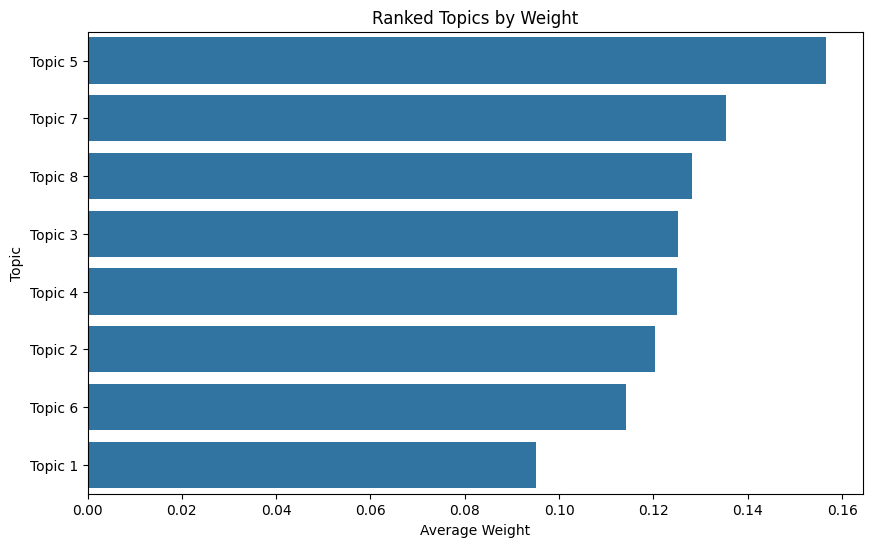

In [16]:

# Step 1: Load and Preprocess Data
# Load the combined dataset (replace file path with your actual file path)
data = pd.read_excel("../results/combine/Tourism.xlsx")

# Preprocess dataset
def preprocess_features(df):
    df['Feature'] = df['Feature'].str.lower().str.replace(r'[^a-z\s]', '', regex=True)
    df['Normalized_Score'] = df['Normalized_Score'].fillna(0)
    return df

data = preprocess_features(data)

# Vectorize the 'Feature' column
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
feature_matrix = vectorizer.fit_transform(data['Feature'])

# Step 2: Topic Modeling
lda = LatentDirichletAllocation(n_components=8, random_state=42)
lda.fit(feature_matrix)

# Display topics
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append([feature_names[i] for i in topic.argsort()[-no_top_words:]])
    return topics

topics = display_topics(lda, vectorizer.get_feature_names_out(), 15)
for i, topic in enumerate(topics):
    print(f"Topic {i + 1}: {', '.join(topic)}")

# Step 3: Rank Challenges
# Extract topic weights for each document
document_topics = lda.transform(feature_matrix)
topic_weights = document_topics.mean(axis=0)

# Create a DataFrame for topic rankings
topic_rankings = pd.DataFrame({
    'Topic': [f'Topic {i + 1}' for i in range(len(topic_weights))],
    'Weight': topic_weights
}).sort_values(by='Weight', ascending=False)

print("\nRanked Topics:")
print(topic_rankings)

# Step 4: Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Weight', y='Topic', data=topic_rankings)
plt.title('Ranked Topics by Weight')
plt.xlabel('Average Weight')
plt.ylabel('Topic')
plt.show()

# Step 5: Export Results
topic_rankings.to_csv("../results/ranked_topics.csv", index=False)

# End of Code



Topics and Top Keywords:
   Topic_ID                                       Top_Keywords  \
0         0  and, gender, tourism, challenges, development,...   
1         1  peace, ambassadors, of, initiatives, by, diplo...   
2         2  mediaactionsattractive, mediaactionscontent, m...   

                                         Word_Scores  
0  0.1235, 0.0947, 0.0869, 0.0785, 0.0694, 0.0694...  
1  0.3047, 0.1580, 0.1419, 0.0929, 0.0929, 0.0929...  
2  0.2277, 0.2277, 0.2277, 0.2277, 0.2277, 0.2277...  

Ranked Topics with Counts:
   Topic_ID                                       Top_Keywords  \
0         0  and, gender, tourism, challenges, development,...   
1         1  peace, ambassadors, of, initiatives, by, diplo...   
2         2  mediaactionsattractive, mediaactionscontent, m...   

                                         Word_Scores  Topic  Count  
0  0.1235, 0.0947, 0.0869, 0.0785, 0.0694, 0.0694...      0    103  
1  0.3047, 0.1580, 0.1419, 0.0929, 0.0929, 0.0929...      

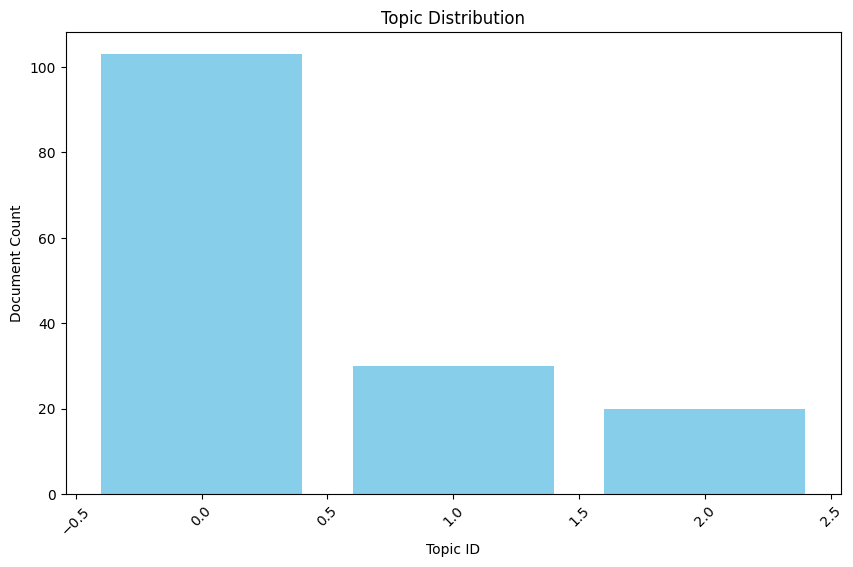

In [48]:
### # Step 1: Load Data
# فرض می‌کنیم فایل ترکیبی قبلی شامل ستون‌های 'Feature' و 'Normalized_Score' است.
data = pd.read_excel("../results/combine/Tourism.xlsx")

# Step 2: Preprocessing
text_data = data['Feature'].dropna().tolist()

# Step 3: Topic Modeling with BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True)
topics, probs = topic_model.fit_transform(text_data)

# Step 4: Extract Topics in DataFrame
# استخراج کلمات کلیدی و وزن هر کلمه برای هر موضوع
topics_info = []
for topic_id in topic_model.get_topics():
    if topic_id != -1:  # Skip the outliers
        topic_words = topic_model.get_topic(topic_id)
        topics_info.append({
            "Topic_ID": topic_id,
            "Top_Keywords": ", ".join([word for word, _ in topic_words]),
            "Word_Scores": ", ".join([f"{score:.4f}" for _, score in topic_words])
        })

topics_df = pd.DataFrame(topics_info)

# نمایش جدول مرتب‌شده موضوعات
print("\nTopics and Top Keywords:")
print(topics_df)

# Step 5: Rank Challenges
# اضافه کردن ستون تعداد اسناد مرتبط با هر موضوع
topic_distribution = topic_model.get_topic_info()
topic_distribution = topic_distribution[topic_distribution["Topic"] != -1]  # حذف Outliers
topics_df = pd.merge(topics_df, topic_distribution[['Topic', 'Count']], left_on="Topic_ID", right_on="Topic")
topics_df = topics_df.sort_values(by="Count", ascending=False)

# نمایش جدول نهایی
print("\nRanked Topics with Counts:")
print(topics_df)

# Step 6: Visualization
plt.figure(figsize=(10, 6))
plt.bar(topics_df["Topic_ID"], topics_df["Count"], color='skyblue')
plt.xlabel("Topic ID")
plt.ylabel("Document Count")
plt.title("Topic Distribution")
plt.xticks(rotation=45)
plt.show()




In [13]:
topics_df.to_excel("../results/combine/bertopic_tourism.xlsx")

In [14]:
topics_df

,Topic_ID,Top_Keywords,Word_Scores,Topic,Count
0,0,"and, gender, tourism, womens, development, equ...","0.1084, 0.1046, 0.0973, 0.0802, 0.0802, 0.0700...",0,35
1,1,"peace, ambassadors, of, initiatives, by, diplo...","0.2242, 0.1243, 0.1087, 0.0758, 0.0758, 0.0758...",1,30
2,2,"peacedevelopmentsolutionseducation, peacedevel...","0.1615, 0.1615, 0.1615, 0.1615, 0.1615, 0.1615...",2,22
3,3,"mediaactionsattractive, mediaactionscontent, m...","0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857...",3,20
4,4,"suggestionsarenas, suggestionsand, suggestions...","0.1955, 0.1955, 0.1955, 0.1955, 0.1955, 0.1955...",4,19
5,5,"peacedevelopmentchallengesfacilities, peacedev...","0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857...",5,17



Final Topics with Keywords:
   Topic  Count                                               Name  \
1      0     64              0_peace_ambassadors_of_brandagreement   
2      1     28                   1_gender_tourism_and_development   
3      2     20  2_mediaactionsattractive_mediaactionscontent_m...   
4      3     19  3_suggestionsarenas_suggestionsand_suggestions...   

                                      Representation  \
1  [peace, ambassadors, of, brandagreement, by, a...   
2  [gender, tourism, and, development, womens, sp...   
3  [mediaactionsattractive, mediaactionscontent, ...   
4  [suggestionsarenas, suggestionsand, suggestion...   

                                 Representative_Docs  \
1  [Peace, Peace Ambassadors, Serving as ambassad...   
2  [Women's Football and Peacebuilding and Touris...   
3  [Media_Actions_cooperation, Media_Actions_fair...   
4  [Suggestions_advance, Suggestions_arenas, Sugg...   

                                        Top_Keywords  
1  

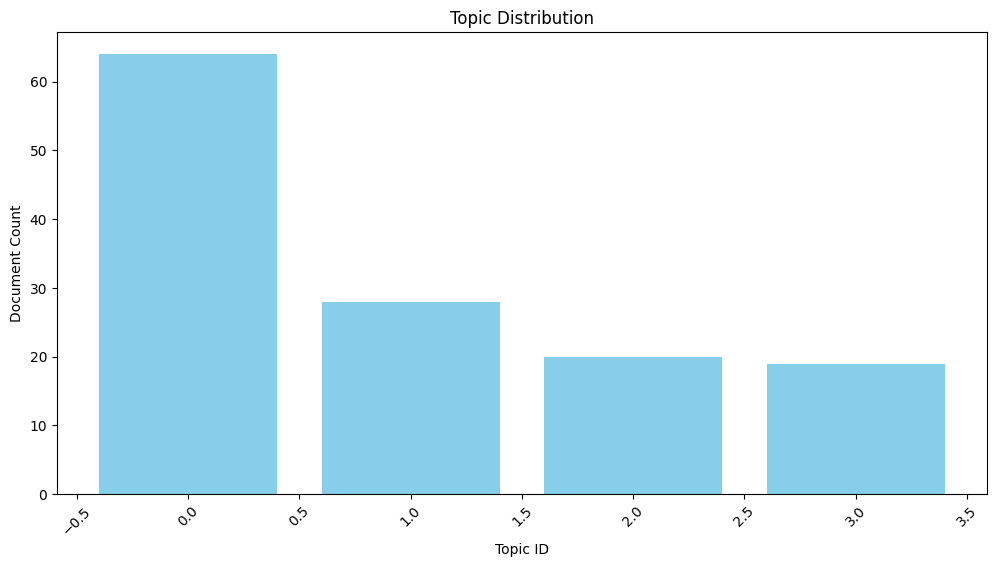

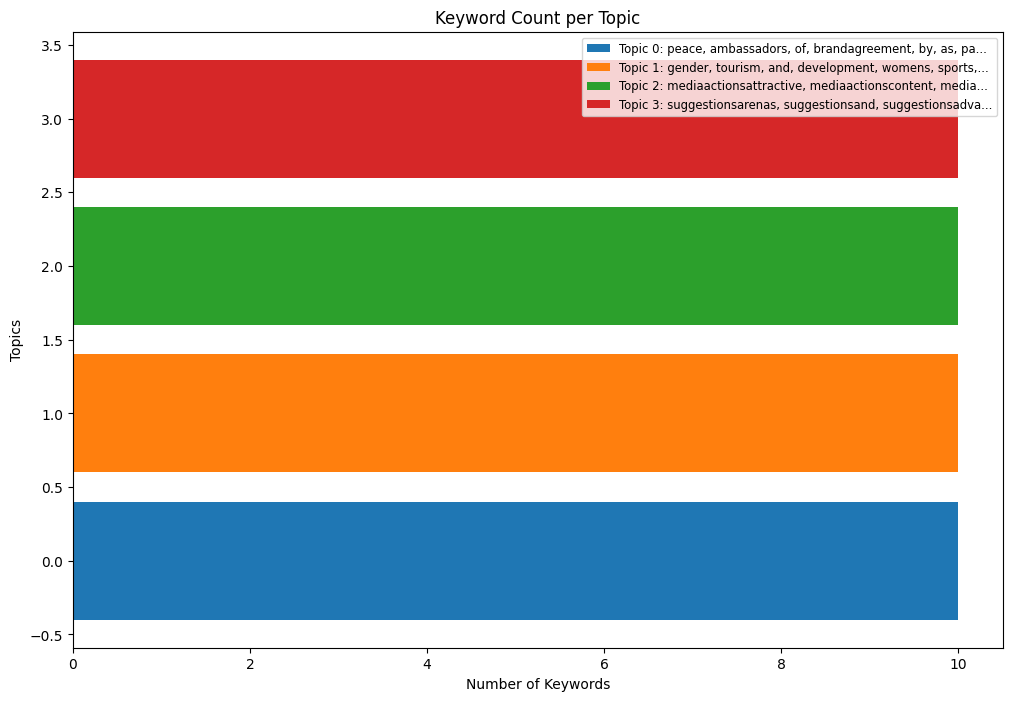

In [47]:
### # Step 1: Load Data
# فرض می‌کنیم فایل ترکیبی قبلی شامل ستون‌های 'Feature' و 'Normalized_Score' است.
data = pd.read_excel("../results/combine/Tourism.xlsx")


# Step 2: Preprocess Data
def preprocess_text(text):
    stop_words = set(["football", "team", "player", "game", "women", "tournament", "event" ])  # کلمات عمومی مرتبط
    tokens = text.split()
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

# data['Feature'] = data['Feature'].apply(preprocess_text)

# Step 3: Topic Modeling with BERTopic
# تنظیم UMAP برای کاهش ابعاد
umap_model = UMAP(n_neighbors=50, n_components=2, metric='cosine')
topic_model = BERTopic(language="english", min_topic_size=3, umap_model=umap_model)

# آموزش مدل و اختصاص موضوعات
topics, probs = topic_model.fit_transform(data['Feature'].tolist())

# Step 4: Reduce Topics (Optional - کاهش تعداد موضوعات)
topic_model.reduce_topics(data['Feature'].tolist(), nr_topics=5)

# Step 5: Extract Topics into DataFrame
topics_info = topic_model.get_topic_info()
topics_info = topics_info[topics_info["Topic"] != -1]  # حذف Outliers

# اضافه کردن کلمات کلیدی هر موضوع به جدول
topic_keywords = []
for topic_id in topics_info["Topic"]:
    topic_words = topic_model.get_topic(topic_id)
    keywords = ", ".join([word for word, _ in topic_words])
    topic_keywords.append(keywords)

topics_info["Top_Keywords"] = topic_keywords

# نمایش جدول موضوعات
print("\nFinal Topics with Keywords:")
print(topics_info)

# Step 6: Visualization
# نمودار توزیع موضوعات
plt.figure(figsize=(12, 6))
plt.bar(topics_info["Topic"], topics_info["Count"], color='skyblue')
plt.xlabel("Topic ID")
plt.ylabel("Document Count")
plt.title("Topic Distribution")
plt.xticks(rotation=45)
plt.show()

# نمودار میله‌ای برای نمایش کلمات کلیدی هر موضوع
plt.figure(figsize=(12, 8))
for topic_id, keywords in zip(topics_info["Topic"], topics_info["Top_Keywords"]):
    plt.barh(topic_id, len(keywords.split(", ")), label=f"Topic {topic_id}: {keywords[:50]}...")

plt.xlabel("Number of Keywords")
plt.ylabel("Topics")
plt.title("Keyword Count per Topic")
plt.legend(loc='best', fontsize='small')
plt.show()

# Step 7: Export Results
topics_info.to_excel("../results/combine/final_topics_with_keywords.xlsx", index=False)

# Save Visualization as an interactive plot (Optional)
topic_model.visualize_barchart(top_n_topics=10).write_html("../results/combine/topics_barchart.html")

